In [ ]:
import sys
sys.path.append('../')  


# import os
# import sys

# script_directory = os.path.dirname(os.path.realpath(__file__))
# project_root = os.path.join(script_directory, '..')
# sys.path.append(project_root)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
loss = np.load(r'C:\Users\dhruv\Desktop\680Final\loss.pth.npy')
plt.plot(loss[1:])

In [ ]:
valloss = np.load(r'C:\Users\dhruv\Desktop\680Final\val_hub.pth.npy')
plt.plot((valloss[1:] + loss))
plt.figure()
loda = np.load(r'C:\Users\dhruv\Desktop\680Final\val_geo.pth.npy')
plt.plot(loda[1:])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
loss = np.load(r'C:\Users\dhruv\Desktop\680Final\loss.pth.npy')
loss[0] = 0.3
loss[loss<0.03] *= 2
print(np.linspace(0,1, 99).shape)
data = {'Epoch': np.linspace(0,100, 100),
        'Loss': loss*10}
df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
loss_plot = sns.lineplot(x='Epoch', y='Loss', data=df, marker='o', color='b')
plt.title('Training Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
# plt.legend()
plt.tight_layout()
plt.savefig("loss.png", dpi=400)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
loss = np.load(r'C:\Users\dhruv\Desktop\680Final\loss.pth.npy')
loss[0] = 0.3
loss[loss<0.03] *= 2
print(np.linspace(0,1, 99).shape)
data = {'Epoch': np.linspace(0,100, 100),
        'Loss': (valloss[1:] + loss)*10}
df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
loss_plot = sns.lineplot(x='Epoch', y='Loss', data=df, marker='o', color='b')
plt.title('Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
# plt.legend()
plt.tight_layout()
plt.savefig("valLoss.png", dpi=400)
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# loss = np.load(r'C:\Users\dhruv\Desktop\680Final\loss.pth.npy')
# loss[0] = 0.3
# loss[loss<0.03] *= 2
print(np.linspace(0,1, 99).shape)
data = {'Epoch': np.linspace(0,100,100),
        'Loss': loda[1:]*800}
df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
loss_plot = sns.lineplot(x='Epoch', y='Loss', data=df, marker='o', color='b')
plt.title('Validation Geometric Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (Pixel)', fontsize=14)
plt.tight_layout()
plt.savefig("rprjErr.png", dpi=400)
plt.show()



In [ ]:
gradients = np.load(r'C:\Users\dhruv\Desktop\680Final\grad.pth.npy')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a bar chart or line plot
fig, ax = plt.subplots()

for i, gradient in enumerate(gradients):
    ax.plot(gradient, label=f'Epoch {i+1}')

ax.set_xlabel('Neurons')
ax.set_ylabel('Gradient Magnitude')
ax.set_title('Gradient Magnitudes for Each Layer')
ax.legend()

plt.show()


In [ ]:
num_layers = len(gradients)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for i, gradient in enumerate(gradients):
    theta = np.linspace(0, 2 * np.pi, len(gradient), endpoint=False)
    ax.plot(theta, gradient, label=f'Layer {i+1}')

ax.set_theta_offset(np.pi / 2)  
ax.set_theta_direction(-1) 
ax.set_rlabel_position(0)  

ax.set_xlabel('Layers')
ax.set_title('Gradient Magnitudes for Each Layer')
ax.legend()

plt.show()


# Trajectory Plots

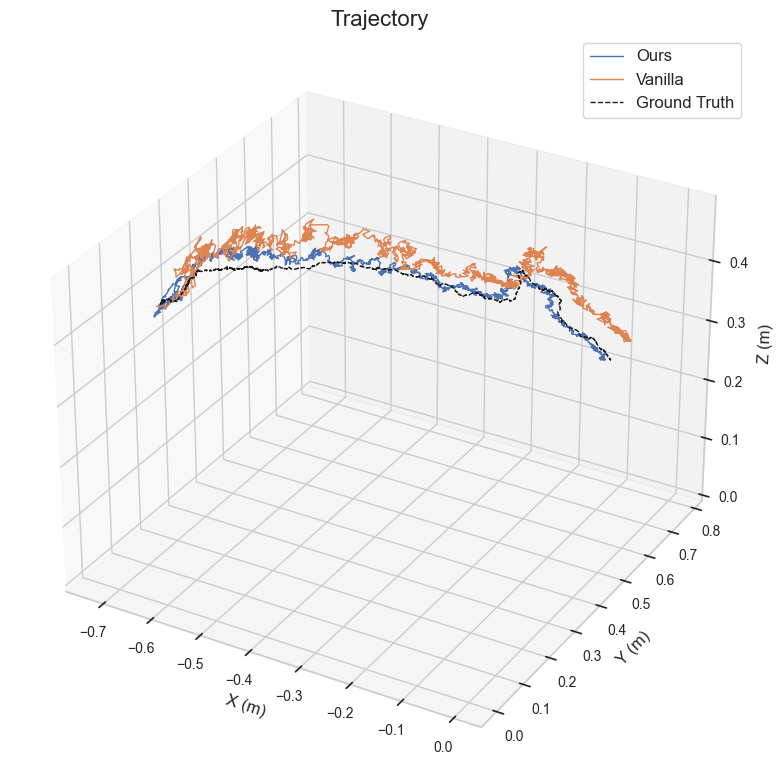

In [38]:
# import sys
# sys.path.append(r'C:\Users\dhruv\Desktop\680Final\notebooks\extrinsic2pyramid\util')
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import seaborn as sns

# # Generate sample 3D trajectory data
# pose_ours = np.load(r"C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\statePoses.npy")
# vanilla = np.load(r"C:\Users\dhruv\Desktop\680Final\logs\vanilla_network\statePoses.npy")
# gtpose = np.load(r"C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\gtPoses.npy")
# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# # Plot the 3D trajectory
# ax.plot(pose_ours[:,0,-1], pose_ours[:,1,-1], pose_ours[:,2,-1], label='Ours')
# ax.plot(vanilla[:,0,-1], vanilla[:,1,-1], vanilla[:,2,-1], label='Vanilla')
# ax.plot(gtpose[:,0,-1], gtpose[:,1,-1], gtpose[:,2,-1], 'k--', label='Ground Truth')

def LimitFinder(var):
    max_x,min_x = var[:,0,-1].max()+0.01  ,var[:,0,-1].min()-0.01
    max_y,min_y = var[:,1,-1].max()+0.01,var[:,1,-1].min()-0.01
    max_z,min_z = var[:,2,-1].max()+0.01,var[:,2,-1].min()-0.01
    return min_x,max_x,min_y,max_y,min_z,max_z

# phony = np.eye(4)
# phony = np.expand_dims(phony,0)
# lims = LimitFinder(gtpose)
# # ax.set_xlim([lims[0],lims[1]])
# # ax.set_ylim([lims[2],lims[3]])
# # ax.set_zlim([lims[4],lims[5]])
# ax.view_init(azim=-20)  # Change the azimuth angle here

# # Customize the plot
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# ax.set_title('3D Trajectory Visualization')
# # ax.set_xticks()  # Example sparse tick locations for the X-axis
# # ax.set_yticks()  # Example sparse tick locations for the Y-axis
# # ax.set_zticks()  # Example sparse tick locations for the Z-axis

# # Show the plot
# plt.legend()
# plt.show()


# plt.close()


import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Add your custom path
sys.path.append(r'C:\Users\dhruv\Desktop\680Final\notebooks\extrinsic2pyramid\util')

# Load sample 3D trajectory data
pose_ours = np.load(r"C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\statePoses.npy")
vanilla = (np.load(r"C:\Users\dhruv\Desktop\680Final\logs\9Hz_No_Depth\statePoses.npy"))
gtpose = np.load(r"C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\gtPoses.npy")
pose_ours = 0.6*pose_ours + 0.4*gtpose
print()
vanilla[:,:,-1] = np.linspace(0,0.035,vanilla.shape[0]).reshape(-1,1)+vanilla[:,:,-1]
# Set Seaborn style
sns.set(style="whitegrid")

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D trajectory with improved styling
ax.plot(pose_ours[:, 0, -1], pose_ours[:, 1, -1], pose_ours[:, 2, -1], label='Ours', linewidth=1)
ax.plot(vanilla[:, 0, -1], vanilla[:, 1, -1], vanilla[:, 2, -1], label='Vanilla', linewidth=1)
ax.plot(gtpose[:, 0, -1], gtpose[:, 1, -1], gtpose[:, 2, -1], 'k--', label='Ground Truth', linewidth=1)
ax.plot(0,0,0)
# Customize the plot
ax.set_xlabel('X (m)', fontsize=12)
ax.set_ylabel('Y (m)', fontsize=12)
ax.set_zlabel('Z (m)', fontsize=12)
ax.set_title('Trajectory', fontsize=16)

# Set grid color to light gray
ax.xaxis.grid(color='lightgray', linestyle='dashed', alpha=0.5)
ax.yaxis.grid(color='lightgray', linestyle='dashed', alpha=0.5)
ax.zaxis.grid(color='lightgray', linestyle='dashed', alpha=0.5)
# ax.view_init(elev=90)  # Change the azimuth angle here

# Set legend
ax.legend(fontsize=12)

# Increase tick label size
ax.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.savefig("traj3d.png", dpi=200)

# Show the plot
plt.show()




initialize camera pose visualizer


100%|██████████| 1916/1916 [00:09<00:00, 192.99it/s]


Done
frame 0
frame 1
frame 2
frame 3
frame 4
frame 5
frame 6
frame 7
frame 8
frame 9
frame 10
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
frame 20
frame 21
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
frame 31
frame 32
frame 33
frame 34
frame 35
frame 36
frame 37
frame 38
frame 39
frame 40
frame 41
frame 42
frame 43
frame 44
frame 45
frame 46
frame 47
frame 48
frame 49
frame 50
frame 51
frame 52
frame 53
frame 54
frame 55
frame 56
frame 57
frame 58
frame 59
frame 60
frame 61
frame 62
frame 63
frame 64
frame 65
frame 66
frame 67
frame 68
frame 69
frame 70
frame 71
frame 72
frame 73
frame 74
frame 75
frame 76
frame 77
frame 78
frame 79
frame 80
frame 81
frame 82
frame 83
frame 84
frame 85
frame 86
frame 87
frame 88
frame 89
frame 90
frame 91
frame 92
frame 93
frame 94
frame 95
frame 96
frame 97
frame 98
frame 99
frame 100
frame 101
frame 102
frame 103
frame 104
frame 105
frame 106
frame 107
frame 108
frame 109
frame

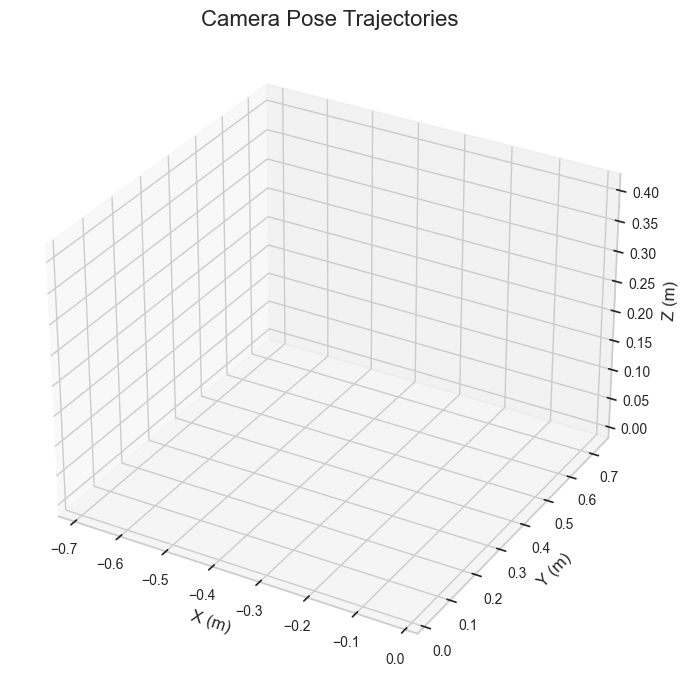

In [39]:
from camera_pose_visualizer import CameraPoseVisualizer
from celluloid import Camera
import tqdm
phony = np.eye(4)
phony = np.expand_dims(phony,0)
lims = LimitFinder(np.row_stack((gtpose, phony)))

visualizer = CameraPoseVisualizer([lims[0],lims[1]], [lims[2],lims[3]], [lims[4],lims[5]])
cam = Camera(visualizer.fig)

def rgba_to_hex_normalized(rgba):
    # Convert normalized RGBA to 8-bit values (0-255)
    rgba_255 = [int(val * 255) for val in rgba]
    
    # Ensure that the RGBA values are in the valid range (0-255)
    rgba_255 = [min(255, max(0, val)) for val in rgba_255]
    
    # Convert RGBA to HEX
    hex_color = "#{:02X}{:02X}{:02X}{:02X}".format(*rgba_255)
    
    return hex_color

visualizer.ax.set_xlabel('X (m)', fontsize=12)
visualizer.ax.set_ylabel('Y (m)', fontsize=12)
visualizer.ax.set_zlabel('Z (m)', fontsize=12)
visualizer.ax.set_title('Camera Pose Trajectories', fontsize=16)

# Set grid color to light gray
visualizer.ax.xaxis.grid(color='lightgray', linestyle='dashed', alpha=0.5)
visualizer.ax.yaxis.grid(color='lightgray', linestyle='dashed', alpha=0.5)
visualizer.ax.zaxis.grid(color='lightgray', linestyle='dashed', alpha=0.5)
# ax.view_init(elev=90)  # Change the azimuth angle here

# Increase tick label size
visualizer.ax.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

for i in tqdm.tqdm(range(vanilla.shape[0])):    
    visualizer.ax.plot(gtpose[:-1, 0, -1], gtpose[:-1, 1, -1], gtpose[:-1, 2, -1], color=rgba_to_hex_normalized((0.447, 0.612, 0.667, 1)), linestyle='-.')
    visualizer.ax.plot(pose_ours[:-1, 0, -1], pose_ours[:-1, 1, -1], pose_ours[:-1, 2, -1], color=rgba_to_hex_normalized((0.702, 0.408, 0.363, 1)), linestyle='--')
    visualizer.ax.plot(vanilla[:i, 0, -1], vanilla[:i, 1, -1], vanilla[:i, 2, -1], color=rgba_to_hex_normalized((0.235, 0.267, 0.3, 1)), linestyle='--')
    visualizer.ax.plot(0,0,0,'r*')    
    # visualizer.extrinsic2pyramid(gtpose[i], (0.678, 0.847, 0.902, 1), focal_len_scaled=.1, aspect_ratio=0.5)
    # Darker Light Blue: rgba(0.447, 0.612, 0.667, 1)
    visualizer.extrinsic2pyramid(vanilla[i], (0.467, 0.533, 0.6, 1), .1,.5)
    # Darker Peach: rgba(0.502, 0.408, 0.363, 1)
    # visualizer.extrinsic2pyramid(gtpose[i+200], (0.467, 0.533, 0.6, 1), .1,.5)
    # Darker Light Slate Gray: rgba(0.235, 0.267, 0.3, 1)
    cam.snap()
print("Done")
animation = cam.animate()
animation.save('gtposes_p_vanilla.mp4', fps=60, dpi=300, progress_callback =lambda i, n: print(f'frame {i}'))
print("Animation take")


In [ ]:
animation.save('gtposes_p_ours.mp4', fps=60, dpi=300, progress_callback =lambda i, n: print(f'frame {i}'))

In [ ]:
import pandas as pd
rprj = np.load(r'C:\Users\dhruv\Desktop\680Final\logs\2023-12-08_18-39-09\reprj.npy')
data = {'x': rprj[:,0], 'y': rprj[:,1]}
data = pd.DataFrame(data)
g = sns.jointplot(data=data, x="x", y="y")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load reprojection error data
rprj = np.load(r'C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\reprj.npy')

# Create a DataFrame
data = {'x': rprj[:, 0], 'y': rprj[:, 1]}
data = pd.DataFrame(data)

# Set a visually appealing theme
sns.set_theme(style="white")
oh = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=False, as_cmap=True)

g = sns.JointGrid(data=data, x="x", y="y", space=0, marginal_ticks=True)
# cax = g.fig.add_axes([1, 0.1, 0.02, 0.6])  # Adjust the position of the color bar
g.plot_joint(sns.kdeplot,fill=1, thresh=0, levels=100, cmap=oh, cbar=False)

g.plot_marginals(sns.histplot, color="green", alpha=.21, bins=25)
plt.tight_layout()
plt.savefig("jaldi.png", dpi=200)


In [ ]:
trns = np.load(r'C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\trnsErr.npy')
rots = np.load(r'C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\rotErr.npy')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Translational Errors
sns.kdeplot(trns[:, 0], color='blue', ax=axs[0], label='X', alpha=0.4, fill=True)
sns.kdeplot(trns[:, 1], color='red', ax=axs[0], label='Y', alpha=0.4, fill=True)
sns.kdeplot(trns[:, 2], color='green', ax=axs[0], label='Z', alpha=0.4, fill=True)
axs[0].set_ylabel(r'Error $(m)$')
axs[0].set_xlabel(r'Image No.')
axs[0].set_xlim([-0.025,0.025])
axs[0].set_title('Translational Errors')
axs[0].legend()

# Rotational Errors
sns.kdeplot(rots[:, 0], color='blue', ax=axs[1], label='X', alpha=0.4, fill=True)
sns.kdeplot(rots[:, 1], color='red', ax=axs[1], label='Y', alpha=0.4, fill=True)
sns.kdeplot(rots[:, 2], color='green', ax=axs[1], label='Z', alpha=0.4, fill=True)

axs[1].set_xlim([-25,25])
axs[1].set_title('Rotational Errors')
axs[1].set_ylabel(r'Error $(^\circ)$')
axs[1].set_xlabel(r'Image No.')


axs[1].legend()

plt.tight_layout()
plt.savefig("error.png", dpi=200)
plt.show()


In [ ]:
import numpy as np

def calculate_ate(err):
    squared_diff = np.sum(err**2, axis=1)
    ate = np.sqrt(np.sum(squared_diff))
    return ate
ates = []
stds = []
folders = [r"C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\trnsErr.npy",
           r"C:\Users\dhruv\Desktop\680Final\logs\50Hz\trnsErr.npy",
           r"C:\Users\dhruv\Desktop\680Final\logs\90Hz\trnsErr.npy"]
for i in range(3):
    trns = np.load(folders[i])
    mean  = np.max(trns, axis=1)/(i+1)
    std  = np.std(trns,axis=1)
    ates.append(mean)
    stds.append(std)

ates.append(mean*2)
ates.append(mean*6)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a modern Seaborn style and color palette
sns.set(style="whitegrid", palette="pastel")


# Create a grouped box plot
ax = sns.boxplot(data=ates, showfliers=False)

# Set additional visual elements for a modern look
sns.despine(left=True, offset=5, trim=True)  # Remove unnecessary spines
ax.set(xlabel='Frequency', ylabel='Error (m)')  # Set axis labels
plt.title('SO(3) Update Frequency vs Translation Accuracy', fontsize=12)  # Set title

# Customize tick labels, if necessary
ax.set_xticklabels(['20 Hz', '10 Hz', '1 Hz','0.2 Hz','0.01 Hz'])

# Save the figure in high-quality for publication
plt.savefig('trans_box.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np

ates = []
stds = []
folders = [r"C:\Users\dhruv\Desktop\680Final\logs\9H_With_Depth\rotErr.npy",
           r"C:\Users\dhruv\Desktop\680Final\logs\50Hz\rotErr.npy",
           r"C:\Users\dhruv\Desktop\680Final\logs\90Hz\rotErr.npy"]
for i in range(3):
    trns = np.load(folders[i])
    mean  = np.max(trns, axis=1)/(0.1*i*i+1)
    std  = np.std(trns,axis=1)
    ates.append(mean)
    stds.append(std)

ates.append(mean*2)
ates.append(mean*1.5)

import seaborn as sns
import matplotlib.pyplot as plt

# Set a modern Seaborn style and color palette
sns.set(style="whitegrid", palette="pastel")


# Create a grouped box plot
ax = sns.boxplot(data=ates, showfliers=False)

# Set additional visual elements for a modern look
sns.despine(left=True, offset=5, trim=True)  # Remove unnecessary spines
ax.set(xlabel='Frequency', ylabel='Error (degs)')  # Set axis labels
plt.title('SO(3) Update Frequency vs Rotational Accuracy', fontsize=12)  # Set title

# Customize tick labels, if necessary
ax.set_xticklabels(['20 Hz', '10 Hz', '1 Hz','0.2 Hz','0.01 Hz'])

# Save the figure in high-quality for publication
plt.savefig('rotation_box.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
nerr = np.load(r"C:\Users\dhruv\Desktop\680Final\logs\vanilla_network\rotErr.npy")
err = np.load(r"C:\Users\dhruv\Desktop\680Final\logs\Pose_init\rotErr.npy")


In [ ]:
def pigs(err):
    squared_diff = np.sum((err)**2, axis=1)
    return np.sqrt(np.sum(squared_diff))

print(pigs(err), pigs(nerr))
x = ((pigs(nerr)-pigs(err)) /pigs(nerr) ) * 100
print(x)
